<div class="alert alert-block alert-info"><h1>各省新冠病毒确诊人数的数据可视化</h1></div>

<div class="alert alert-block alert-success"> <h3>作者：1907020121 程元烁</h3></div> 

## 1 代码目的

* 利用获取的各省新冠病毒确诊人数数据绘制疫情地图


## 2 数据及其他所需材料准备

### 2.1 数据来源

* "新型肺炎实时疫情追踪": <http://m.look.360.cn/subject/400?sign=360_6aa05217>  
>提示:这里仅使用各省人数数据，获取数据后保存为csv文件，格式为左边一列省名，右边一列人数。

### 2.2 相关材料下载

* pyproj与basemap: <https://www.lfd.uci.edu/~gohlke/pythonlibs/>  
* 地图轮廓: <http://www.gadm.org/country>
>提示:由于文件下载缓慢，地图shp文件与pyproj已上传到github:
><https://github.com/Cyuanshuo/data_visualization_virus>  
>basemap文件太大不能上传，若上述网址无法下载可到csdn下载或寻求他人帮助
## 3 详细代码

### 3.1 加载库

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon,Patch

### 3.2 数据处理

province_data.csv文件中的数据如下  

|province|number|   
|  ----  | ----  |  
| 湖北  | 16678 |    
| 浙江  | 895 |  
 . . . . . .  

                   

In [2]:
def dic():
    # 指定encodeing='utf-8'中文防止乱码，读取csv文件时采用'utf-8-sig'，防止后序处理带有BOM的文件时出错
    with open('E:/Python/projects/virue_1902/province_data.csv','r', encoding='utf-8-sig') as csvfile:
        
        #指定列名,如上表
        #将csv文件的数据取出,此时为多个字典组成的列表，每个字典含两个键值对
        reader = csv.DictReader(csvfile)

        #取出键province和number的值拼接为字典,注意number的值转换为int类型
        return {row['province']:int(row['number']) for row in reader }
        

### 3.3  绘图相关函数

#### 3.3.1 根据数据返回颜色

In [3]:
#参数val为各省的数据，以下将数据分段并返回颜色
def colors(val):
    if val<10:
        return '#ffd7bb'
    elif val<100:
        return '#ffad83'
    elif val<500:
        return '#f2684f'
    elif val<1000:
        return '#d02327'
    else:
        return '#6f151c'

#### 3.3.2 绘制地图（除南海诸岛）

In [4]:
def virus_map(pop_dic,llcrnrlon_,llcrnrlat_,urcrnrlon_,urcrnrlat_,projection_,lat_0_,lon_0_):
    
    #创建Basemap的实例‘m’，参数为经纬度、投影方式、映射中心
    m = Basemap(llcrnrlon=llcrnrlon_, llcrnrlat=llcrnrlat_, urcrnrlon=urcrnrlon_, urcrnrlat=urcrnrlat_, projection=projection_, lat_0=lat_0_,lon_0=lon_0_)

    #读取除台湾省外的中国轮廓，除台湾省外各省级行政区轮廓，台湾省轮廓，南海九段线，南海诸岛的shp文件。
    m.readshapefile('/Python/projects/virue_1902/map/china_exTW/gadm36_CHN_0', 'china', drawbounds=True)
    m.readshapefile('/Python/projects/virue_1902/map/china_exTW/gadm36_CHN_1', 'states', drawbounds=True)
    m.readshapefile('/Python/projects/virue_1902/map/taiwan/gadm36_TWN_0', 'taiwan', drawbounds=True)
    m.readshapefile('/Python/projects/virue_1902/map/south_china_sea/nine_dashed_line', 'nine_dashed_line', drawbounds=True)
    m.readshapefile('/Python/projects/virue_1902/map/south_china_sea/south_china_sea', 'south_china_sea', drawbounds=True)
    
    #获取当前axes
    ax = plt.gca()
    
    #m.states_info为一个列表类型，其元素m.states_info[i]为字典类型，储存该省的名称等信息
    for i in range(len(m.states_info)):
        statename = m.states_info[i]['NL_NAME_1']

        #在m.states_info[i]['NL_NAME_1']中，简繁体名用竖线隔开，例如‘黑龍江省|黑龙江省’，这里我们取倒数第一个名字，及取简体名
        s = statename.split('|')[-1]
        
        #省名称与数据匹配，shp文件中省名称为全称，我们获取的数据中为简称，因此需做相关调整
        #pop储存该省数据
        if s=="黑龍江省":
            pop=pop_dic['黑龙江']
        elif s=='内蒙古自治区':
            pop=pop_dic['内蒙古']
        else:
            pop = pop_dic[s[:2]]
            
        #m.states为一个列表类型，每个元素m.states[i]又是一个列表类型，在其中每个元素为该省范围内的一点的经纬度位置坐标
        poly = Polygon(m.states[i],facecolor=colors(pop))
        
        #添加patch到当前axes，即完成对一个省的上色
        ax.add_patch(poly)
        
        #同理绘制台湾省
    for seg in m.taiwan:
        poly = Polygon(seg, facecolor= colors(pop_dic['台湾']))
        ax.add_patch(poly)

#### 3.3.3 绘制图例

In [5]:
def legend(left,bottom,size,length):
    color = ['#6f151c','#d02327', '#f2684f','#ffad83','#ffd7bb']
    labels = ['>=1000', '500-999', '100-499', '10-99','<10']
    patches = [ Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
    ax1=plt.gca()
    
    #调整图例位置，frameon为是否显示外面的方框，ncol为列数
    ax1.legend(handles=patches, bbox_to_anchor=(left,bottom),fontsize=size,frameon=False,handlelength=length,labelspacing=0.5,fancybox=True,ncol=1) 

### 3.4 执行代码

e:\python\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
e:\python\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
e:\python\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
e:\python\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
e:\python\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3

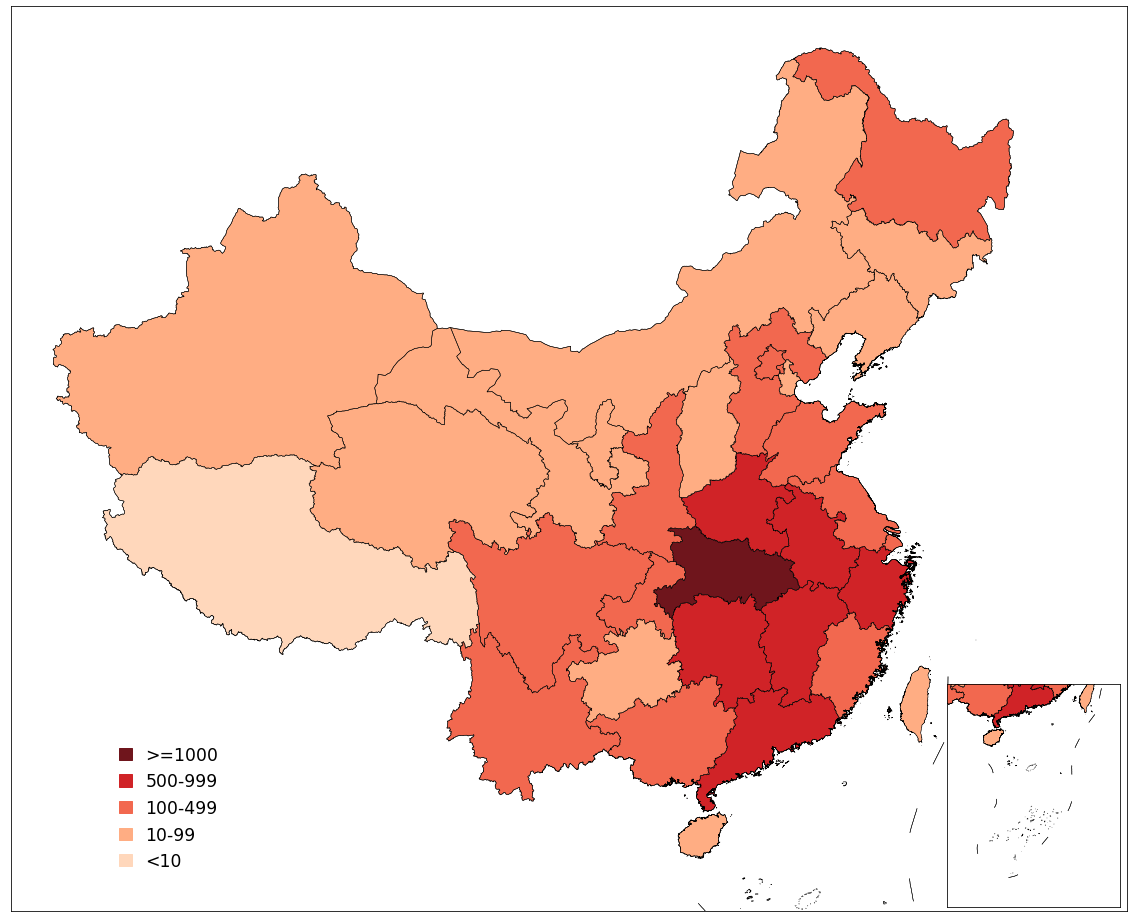

In [6]:
#读取数据，储存为字典类型
pop_dic=dic()

#创建figure的实例
fig=plt.figure(figsize=(20,21))

#绘地图及图例，"lcc"为兰勃特投影
virus_map(pop_dic,78,14,145,51,'lcc',33,100)
legend(0.2,0.2,'xx-large',0.7)

#要绘制南海诸岛的画中画效果，可另建立一个axes放于右下角，在其中再次绘图，经纬度位置调整为南海位置即可
left,bottom,width,height = 0.775,0.2,0.12,0.16
ax2 = fig.add_axes([left,bottom,width,height])
virus_map(pop_dic,105,0,125,25,'lcc',12,115)

#保存图片：fig.savefig("E:/Python/projects/virue_1902/map.png")
plt.show()